# Forecasting the CocaCola Sales Rawdata data set

### IMPORTING LIBRARIES

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### IMPORTING DATA

In [6]:
series = pd.read_excel("C:\\Users\\wARcRACK\\ExcelRAssignments\\Assignment18(Forecasting)\\Datasets\\CocaCola_Sales_Rawdata.xlsx")

In [7]:
series.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [8]:
series.tail()

,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


In [9]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 804.0+ bytes


In [10]:
series.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [11]:
series.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [12]:
#We will extract Quarter values and Year values separately from 'Quarter column'
series['Quarters']=0
series['Year']=0
for i in range(42):
    p=series["Quarter"][i]
    series['Quarters'][i]=p[0:2]
    series['Year'][i]=p[3:5]

C:\Users\wARcRACK\AppData\Local\Temp\ipykernel_1868\4086445688.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series['Quarters'][i]=p[0:2]
C:\Users\wARcRACK\AppData\Local\Temp\ipykernel_1868\4086445688.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Q1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  series['Quarters'][i]=p[0:2]
C:\Users\wARcRACK\AppData\Local\Temp\ipykernel_1868\4086445688.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series['Year'][i]=p[3:5]
C:\Users\wARcRACK\AppData\Local\T

In [13]:
series.head()

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [14]:
#Getting dummy variables for Q1,Q2,Q3,Q4
quarters_dummies = pd.DataFrame(pd.get_dummies(series['Quarters']))
series = pd.concat([series,quarters_dummies],axis=1)
series.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,True,False,False,False
1,Q2_86,2244.960999,Q2,86,False,True,False,False
2,Q3_86,2533.804993,Q3,86,False,False,True,False
3,Q4_86,2154.962997,Q4,86,False,False,False,True
4,Q1_87,1547.818996,Q1,87,True,False,False,False


In [15]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Quarter   42 non-null     object 
 1   Sales     42 non-null     float64
 2   Quarters  42 non-null     object 
 3   Year      42 non-null     object 
 4   Q1        42 non-null     bool   
 5   Q2        42 non-null     bool   
 6   Q3        42 non-null     bool   
 7   Q4        42 non-null     bool   
dtypes: bool(4), float64(1), object(3)
memory usage: 1.6+ KB


# visualize the data in Heatmap

<Axes: xlabel='Quarters', ylabel='Year'>

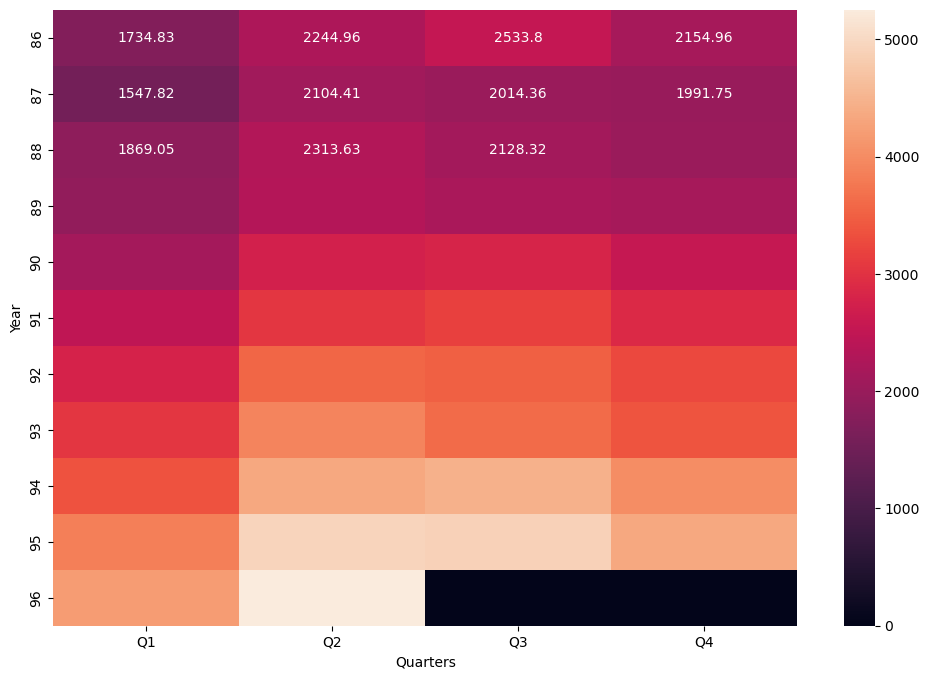

In [16]:
plt.figure(figsize=(12,8))
heatmap_y_year = pd.pivot_table(data=series,values="Sales",index="Year",columns="Quarters",fill_value=0)
sns.heatmap(heatmap_y_year,annot=True,fmt="g")

# Line plot

<Axes: >

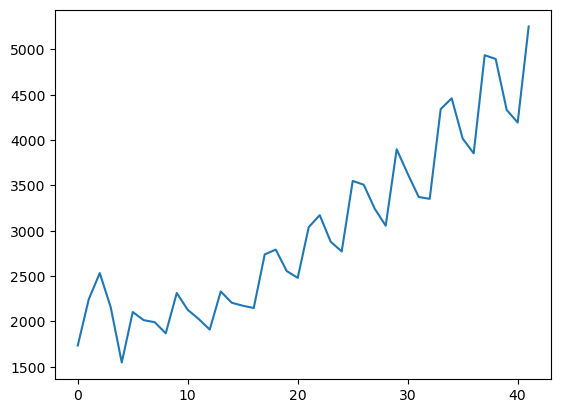

In [17]:
series.Sales.plot()

# Histogram and Density Plots

<Axes: >

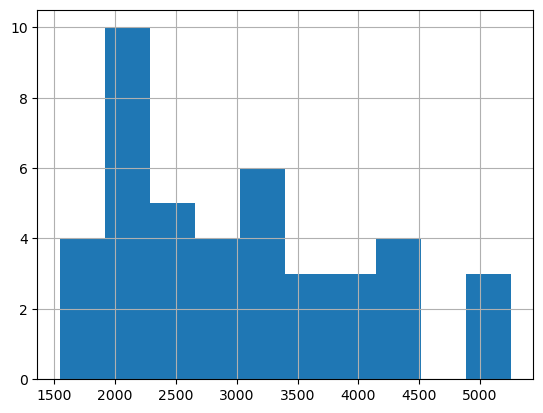

In [18]:
series.Sales.hist()

<Axes: ylabel='Density'>

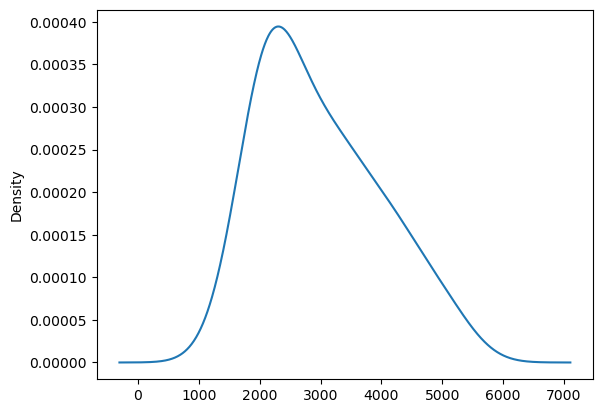

In [19]:
series.Sales.plot(kind='kde')

# Lag plot

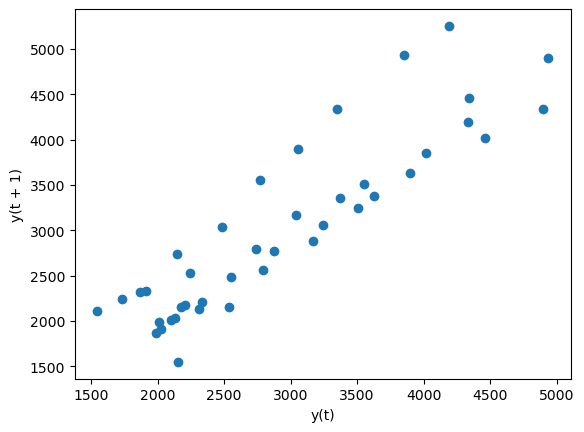

In [20]:
# create a scatter plot

from pandas.plotting import lag_plot
lag_plot(series.Sales)
plt.show()

# ACF and PACF Plot

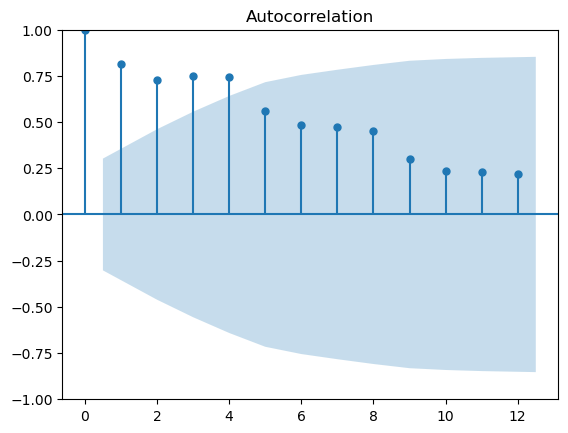

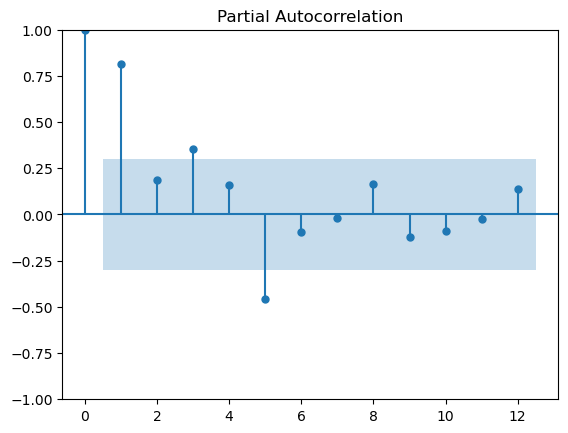

In [21]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(series.Sales,lags=12)
tsa_plots.plot_pacf(series.Sales,lags=12)
plt.show()

# Box Plot

<Axes: xlabel='Year', ylabel='Sales'>

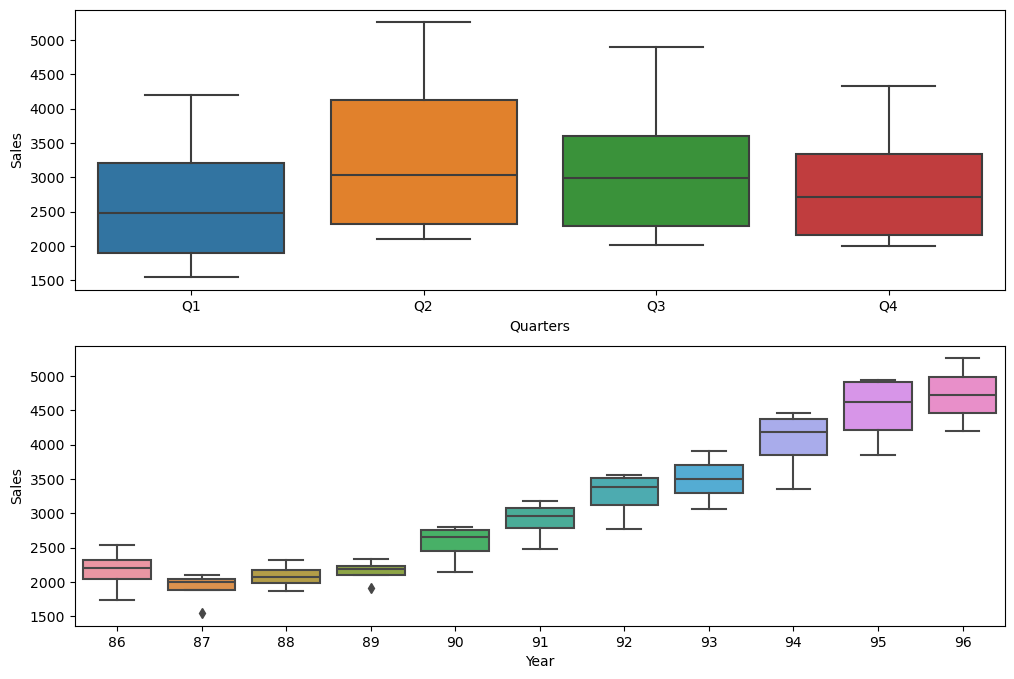

In [22]:
plt.figure(figsize=(12,8))
plt.subplot(211)
sns.boxplot(x="Quarters",y="Sales",data=series)
plt.subplot(212)
sns.boxplot(x="Year",y="Sales",data=series)

# Model based Forecasting

In [23]:
#Data Preprocessing for Models
series["t"] = np.arange(1,43)
series["t_squared"] = series["t"]*series["t"]
series["log_sales"] = np.log(series["Sales"])
series.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,True,False,False,False,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,False,True,False,False,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,False,False,True,False,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,False,False,False,True,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,True,False,False,False,5,25,7.344602


C:\Users\wARcRACK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wARcRACK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Sales'>

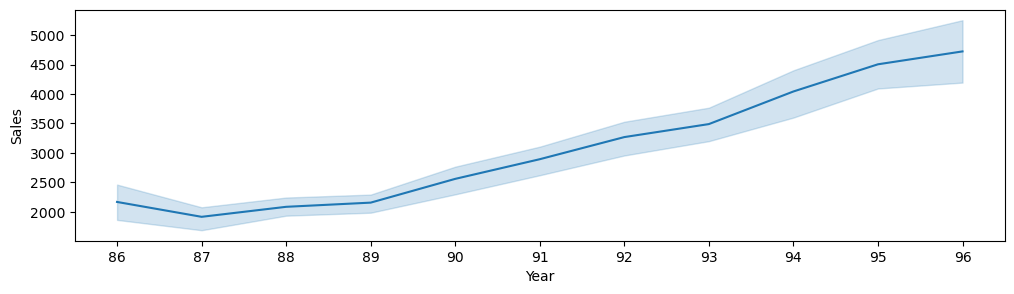

In [24]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Sales",data=series)

# Moving Average

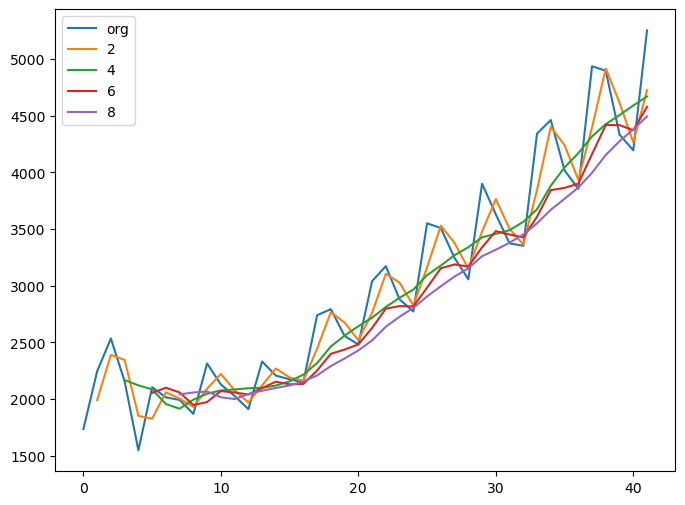

In [25]:
plt.figure(figsize=(8,6))
series.Sales.plot(label="org")
for i in range(2,10,2):
    series["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

<Axes: >

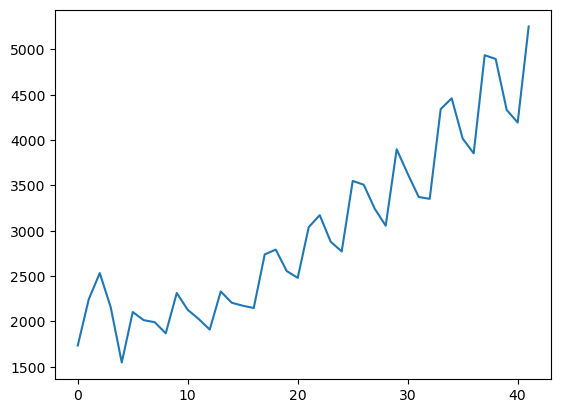

In [26]:
series.Sales.plot()

# Time Series Decomposition Plot

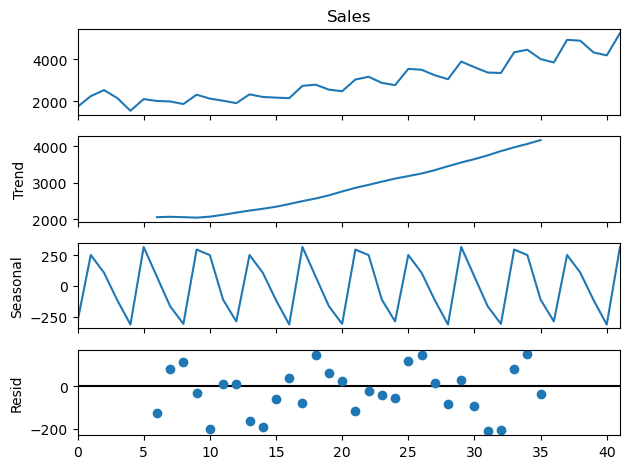

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(series.Sales,period=12)
decompose_ts_add.plot()
plt.show()

# Splitting data

In [28]:
train = series.head(32)
test = series.tail(10)

In [29]:
#Linear Model
import statsmodels.formula.api as smf
linear_model = smf.ols('Sales~t', data=train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

752.9233932767115

In [30]:
#Exponential Model
Exp = smf.ols('log_sales~t', data=train).fit()
pred_exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

590.3316432076576

In [31]:
#Quadratic 

Quad = smf.ols('Sales~t+t_squared',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

457.73573554072897

In [32]:
#Additive seasonality 

add_sea = smf.ols('Sales~Q1+Q2+Q3',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Q1','Q2','Q3']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1850.4665461858353

In [33]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

277.35107711284843

In [34]:
#Multiplicative Seasonality

Mul_sea = smf.ols('log_sales~Q1+Q2+Q3',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1908.250394836116

In [35]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

448.8678182691621

In [36]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,277.351077
6,rmse_Mult_add_sea,448.867818
2,rmse_quad,457.735736
1,rmse_exp,590.331643
0,rmse_linear,752.923393
3,rmse_add_sea,1850.466546
5,rmse_Mult_sea,1908.250395


In [37]:
data = [['Q3_96', 'Q3'], ['Q4_96', 'Q4'], ['Q1_97', 'Q1'],['Q2_97', 'Q2']]
print(data)
forecast = pd.DataFrame(data, columns = ['Quarter', 'quarter'])
forecast

[['Q3_96', 'Q3'], ['Q4_96', 'Q4'], ['Q1_97', 'Q1'], ['Q2_97', 'Q2']]


,Quarter,quarter
0,Q3_96,Q3
1,Q4_96,Q4
2,Q1_97,Q1
3,Q2_97,Q2


# Create dummies and T and T-Squared columns

In [38]:
dummies = pd.DataFrame(pd.get_dummies(forecast['quarter']))
forecast1 = pd.concat([forecast,dummies],axis = 1)

forecast1["t"] = np.arange(1,5)   
forecast1["t_squared"] = forecast1["t"]*forecast1["t"] 
print("\nAfter Dummy, T and T-Square\n\n",forecast1.head())


After Dummy, T and T-Square

   Quarter quarter     Q1     Q2     Q3     Q4  t  t_squared
0   Q3_96      Q3  False  False   True  False  1          1
1   Q4_96      Q4  False  False  False   True  2          4
2   Q1_97      Q1   True  False  False  False  3          9
3   Q2_97      Q2  False   True  False  False  4         16


# Forecasting using Additive Seasonality Quadratic Model

In [39]:
model_full = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=series).fit()
pred_new  = pd.Series(model_full.predict(forecast1))
pred_new

forecast1["forecasted_sales"] = pd.Series(pred_new)

# Final Prediction for next 4 Quarters

In [40]:
Final_predict = forecast1.loc[:, ['Quarter', 'forecasted_sales']] 
Final_predict

,Quarter,forecasted_sales
0,Q3_96,2180.858824
1,Q4_96,1851.383709
2,Q1_97,1635.419724
3,Q2_97,2284.261547
